# DATA ANALYSIS: LUNCH BOX in USA

In [1]:
# import librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

In [2]:
# import data

df = pd.read_excel('sold_product.xlsx')
df.head()

,date_sign_up,customer_id,product_name,marketing_channel,City,Gross Product Margin,Overall Product Margin,Count of product
0,2015-04-16 07:35:22,201307,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Diego,35,25.0,1
1,2015-04-13 12:08:19,205322,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1
2,2015-04-13 08:10:19,214667,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Chicago,35,34.0,1
3,2015-04-13 08:50:19,215381,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1
4,2015-04-13 09:09:18,215561,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1


## 1/How many customers purchased more than 1 product?

In [3]:
customer_counts = df.groupby('customer_id')['Count of product'].sum()
cust = customer_counts[customer_counts > 1 ]
len(cust)

4

In [4]:
# using only the columns Count of product: 
print('customers ID =' ,df[(df['Count of product']>1)]['customer_id'].unique())
print(len(df[(df['Count of product']>1)]['customer_id'].unique()), 'customers have bought > 1 product')

customers ID = [226594 220418 221501 221710]
4 customers have bought > 1 product


In [5]:
display(df[(df['Count of product']!=1)])

#Attempt by calculating the diff all - (all-duplicates): DO NOT WORKS here is why: 
Ntot= np.size(df.index); print('Ntot=',Ntot)
Nunique = df.customer_id.unique().size; print('Nunique=',Nunique)
Ncust_sup1 = Ntot - Nunique
print('customer that purchased more than 1 product =',Ncust_sup1)
print('WRONG because triplicate count 2 duplicates (see results below) \n instead do this: ')

# Alternative way to do it using SET function: 
customer_list = df.customer_id
dejavu = set()
dup = [x for x in customer_list if x in dejavu or (dejavu.add(x) or False)]
print('IDs that duplicate = ',dup) 
print('n unique IDs = ', np.unique(dup))
print('Conclusion = ' , len(np.unique(dup)), 'customers have bought > 1 product')

,date_sign_up,customer_id,product_name,marketing_channel,City,Gross Product Margin,Overall Product Margin,Count of product
314,2015-04-19 19:56:20,226594,Classic - 3 meals per week for 2 people,Newsletters (internal),Miami,35,26.5,2
315,2015-04-19 19:56:21,226594,Classic - 3 meals per week for 4 people,Newsletters (internal),Miami,58,49.5,2
353,2015-04-15 09:55:21,220418,Classic - 3 meals per week for 4 people,Newsletters (internal),Philadelphia,58,56.0,3
354,2015-04-15 09:55:22,220418,Classic - 3 meals per week for 4 people,Newsletters (internal),Philadelphia,58,56.0,3
439,2015-04-15 09:55:22,220418,Classic - 3 meals per week for 2 people,Newsletters (internal),Philadelphia,35,33.0,3
440,2015-04-15 18:12:20,221501,3 Meals (vegetarian) for 4 people,Newsletters (internal),Philadelphia,52,50.0,2
441,2015-04-15 18:12:20,221501,Classic - 3 meals per week for 2 people,Newsletters (internal),Philadelphia,35,33.0,2
474,2015-04-15 19:32:18,221710,3 Meals (vegetarian) for 2 people,Newsletters (internal),San Diego,37,27.0,2
475,2015-04-15 19:32:18,221710,Classic - 3 meals per week for 4 people,Newsletters (internal),San Diego,58,48.0,2


Ntot= 862
Nunique= 857
customer that purchased more than 1 product = 5
WRONG because triplicate count 2 duplicates (see results below) 
 instead do this: 
IDs that duplicate =  [226594, 220418, 220418, 221501, 221710]
n unique IDs =  [220418 221501 221710 226594]
Conclusion =  4 customers have bought > 1 product


## 2/Prepare a chart that shows sold food boxes per weekday 

In [6]:
df['weekday'] = df['date_sign_up'].dt.day_name()
df.head()

,date_sign_up,customer_id,product_name,marketing_channel,City,Gross Product Margin,Overall Product Margin,Count of product,weekday
0,2015-04-16 07:35:22,201307,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Diego,35,25.0,1,Thursday
1,2015-04-13 12:08:19,205322,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1,Monday
2,2015-04-13 08:10:19,214667,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Chicago,35,34.0,1,Monday
3,2015-04-13 08:50:19,215381,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1,Monday
4,2015-04-13 09:09:18,215561,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1,Monday


In [7]:
df.isna().sum()

date_sign_up              0
customer_id               0
product_name              0
marketing_channel         0
City                      0
Gross Product Margin      0
Overall Product Margin    0
Count of product          0
weekday                   0
dtype: int64

In [8]:
sold_per_weekday = df.groupby('weekday')['Count of product'].sum()
sold_per_weekday

weekday
Friday        71
Monday       105
Saturday      87
Sunday       130
Thursday      63
Tuesday      221
Wednesday    197
Name: Count of product, dtype: int64

In [9]:
sold_per_weekday.index

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='weekday')

In [10]:
sold_per_weekday.values

array([ 71, 105,  87, 130,  63, 221, 197])

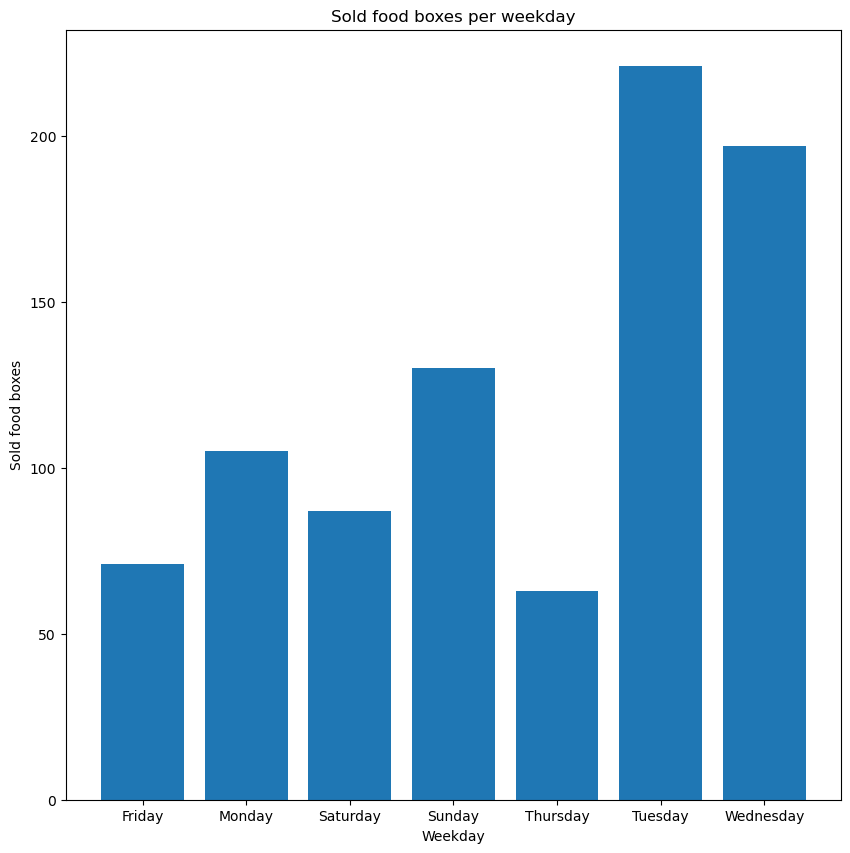

In [11]:
plt.figure(figsize = (10,10))
plt.bar(sold_per_weekday.index, sold_per_weekday.values)
plt.xlabel('Weekday')
plt.ylabel("Sold food boxes")
plt.title('Sold food boxes per weekday')
plt.show()

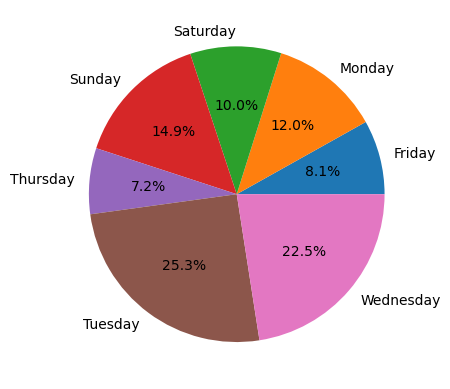

In [12]:
plt.pie(x=sold_per_weekday.values, 
        labels=sold_per_weekday.index, 
        autopct =  lambda x: str(x.round(1)) + '%',
        counterclock=True
       ); 


<Axes: title={'center': 'Count of product'}, xlabel='weekday'>

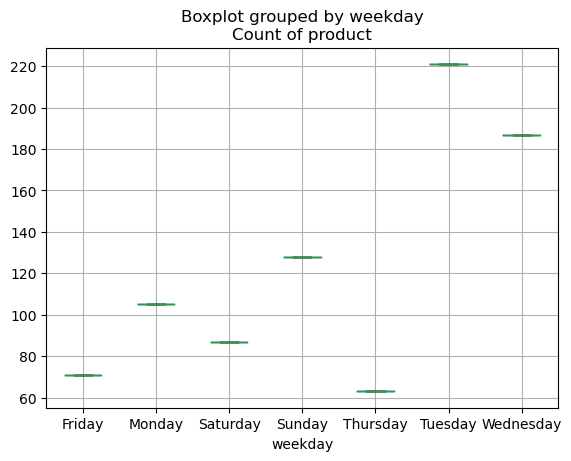

In [13]:
sold_per_weekday2 = df[['Count of product','weekday']].groupby('weekday').count()
sold_per_weekday2.boxplot(column='Count of product', by='weekday')

In [ ]:
fig = go.Figure(data = go.Bar( x = sold_per_weekday.index , y = sold_per_weekday.values))

fig.update_layout(
    title='Sold Food Boxes per Weekday',
    xaxis_title='Weekday',
    yaxis_title='Sold Food Boxes',
    width=800,
    height=600
)

## 3/How many products sold for 2 people vs for 4 people?

In [ ]:
df['product_name'].value_counts()

product_name
Classic - 3 meals per week for 2 people    635
Classic - 3 meals per week for 4 people    130
3 Meals (vegetarian) for 2 people           85
3 Meals (vegetarian) for 4 people           12
Name: count, dtype: int64

In [16]:
df.groupby('product_name')['Count of product'].sum()
# 'the mismatch between value count and groupby come from triplicate (see the end of section 1/) ')
# in that case value count is more accurate')

product_name
3 Meals (vegetarian) for 2 people           86
3 Meals (vegetarian) for 4 people           13
Classic - 3 meals per week for 2 people    639
Classic - 3 meals per week for 4 people    136
Name: Count of product, dtype: int64

In [17]:
# function to read number of people (2 or 4): 

def number_of_people(x):
    if '2' in x :
        return 2

    elif '4' in x :
        return 4

df['number_of_people'] = df['product_name'].apply(number_of_people)
display(df.head())

### option 1
print('option1 =', df.groupby('number_of_people')['Count of product'].count())

### option 2
print('option2 =', df.groupby('number_of_people')['Count of product'].sum())

print('because of what we have seen in section 1/ we favor option 1 here')

,date_sign_up,customer_id,product_name,marketing_channel,City,Gross Product Margin,Overall Product Margin,Count of product,weekday,number_of_people
0,2015-04-16 07:35:22,201307,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Diego,35,25.0,1,Thursday,2
1,2015-04-13 12:08:19,205322,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1,Monday,2
2,2015-04-13 08:10:19,214667,Classic - 3 meals per week for 2 people,TV / Radio Advertising,Chicago,35,34.0,1,Monday,2
3,2015-04-13 08:50:19,215381,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1,Monday,2
4,2015-04-13 09:09:18,215561,Classic - 3 meals per week for 2 people,Newsletters (internal),Chicago,35,34.0,1,Monday,2


option1 = number_of_people
2    720
4    142
Name: Count of product, dtype: int64
option2 = number_of_people
2    725
4    149
Name: Count of product, dtype: int64
because of what we have seen in section 1/ we favor option 1 here


## 4/ How many food boxes "Classic - 3 meals per week for 2 people" were sold via marketing channel "TV / Radio Advertising"?

In [18]:
# quick answer:

counts_sold = df.loc[(df['marketing_channel'] == 'TV / Radio Advertising') & (df['product_name'] == 'Classic - 3 meals per week for 2 people' ) ]
print('answer=',counts_sold['Count of product'].count())

answer= 203


In [19]:
# long answer, explained in details:

display(df[['product_name', 'marketing_channel']].head())
print(df.marketing_channel.value_counts(), '\n')
print(df.product_name.value_counts(), '\n')

# looking for intersection between TVradio AND Classic2people
AA = df[['product_name', 'marketing_channel']]; 
idx_Classic2people = AA.product_name=='Classic - 3 meals per week for 2 people';
print('Nb of idx_Classic2people is True = ',  idx_Classic2people.sum())
idx_TVradio = AA.marketing_channel=='TV / Radio Advertising'; 
print('Nb of idx_TVradio is True  = ',  idx_TVradio.sum())
intersect = idx_Classic2people & idx_TVradio
print('The intersection is = ',  intersect.sum(), '\n')
print('Conclusion: the Nb of "Classic food boxes for 2 people" via "TV/radio" advertising is =', 
      intersect.sum())

,product_name,marketing_channel
0,Classic - 3 meals per week for 2 people,TV / Radio Advertising
1,Classic - 3 meals per week for 2 people,Newsletters (internal)
2,Classic - 3 meals per week for 2 people,TV / Radio Advertising
3,Classic - 3 meals per week for 2 people,Newsletters (internal)
4,Classic - 3 meals per week for 2 people,Newsletters (internal)


marketing_channel
Newsletters (internal)     409
TV / Radio Advertising     259
Search Engine Marketing    105
Partnership Marketing       89
Name: count, dtype: int64 

product_name
Classic - 3 meals per week for 2 people    635
Classic - 3 meals per week for 4 people    130
3 Meals (vegetarian) for 2 people           85
3 Meals (vegetarian) for 4 people           12
Name: count, dtype: int64 

Nb of idx_Classic2people is True =  635
Nb of idx_TVradio is True  =  259
The intersection is =  203 

Conclusion: the Nb of "Classic food boxes for 2 people" via "TV/radio" advertising is = 203


## 5/Create an additional column with states names 

In [20]:
state = pd.read_csv('state.csv')
display(state.head())
print(np.array(state.iloc[0,:]))
print(np.array(state.columns))

,State,California,California.1,California.2,Florida,Pennsylvania,Washington,Illinois,New York
0,City,San Diego,Los Angeles,San Francisco,Miami,Philadelphia,Washington,Chicago,New York


['City' 'San Diego' 'Los Angeles' 'San Francisco' 'Miami' 'Philadelphia'
 'Washington' 'Chicago' 'New York']
['State' 'California' 'California.1' 'California.2' 'Florida'
 'Pennsylvania' 'Washington' 'Illinois' 'New York']


In [21]:
# Creating my_tab_state
my_tab_state = pd.DataFrame();
my_tab_state['State']= np.array(state.columns); 
my_tab_state['City']= np.array(state.iloc[0,:]); 
my_tab_state.drop([0],inplace=True)
my_tab_state.head(10)

,State,City
1,California,San Diego
2,California.1,Los Angeles
3,California.2,San Francisco
4,Florida,Miami
5,Pennsylvania,Philadelphia
6,Washington,Washington
7,Illinois,Chicago
8,New York,New York


In [22]:
# Merging  Californian Cities into one state 
df = df.merge(right=my_tab_state , on= 'City', how= 'outer')
df.head()

,date_sign_up,customer_id,product_name,marketing_channel,City,Gross Product Margin,Overall Product Margin,Count of product,weekday,number_of_people,State
0,2015-04-16 07:35:22,201307,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Diego,35,25.0,1,Thursday,2,California
1,2015-04-16 09:35:25,214129,Classic - 3 meals per week for 4 people,Search Engine Marketing,San Diego,58,48.0,1,Thursday,4,California
2,2015-04-16 09:30:21,215505,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Diego,35,25.0,1,Thursday,2,California
3,2015-04-16 11:49:18,217739,Classic - 3 meals per week for 4 people,Newsletters (internal),San Diego,58,48.0,1,Thursday,4,California
4,2015-04-17 09:39:19,217784,Classic - 3 meals per week for 4 people,Newsletters (internal),San Diego,58,48.0,1,Friday,4,California


In [25]:
df.State.value_counts()

State
California      204
Florida         163
California.2    136
Pennsylvania    125
California.1    122
Washington       49
Illinois         39
New York         15
Name: count, dtype: int64

In [26]:
# Grouping Californian Cities into one state 
df.State = df.State.replace(to_replace=['California.1','California.2'],value=['California', 'California'])
df.State.value_counts()

State
California      462
Florida         163
Pennsylvania    125
Washington       49
Illinois         39
New York         15
Name: count, dtype: int64

In [27]:
df['City'].unique()

array(['San Diego', 'Chicago', 'Los Angeles', 'Miami', 'New York',
       'Philadelphia', 'San Dego', 'San Diego ', 'San Francisco',
       'SanDiego', 'Washington'], dtype=object)

In [28]:
df.isna().sum()

date_sign_up              0
customer_id               0
product_name              0
marketing_channel         0
City                      0
Gross Product Margin      0
Overall Product Margin    0
Count of product          0
weekday                   0
number_of_people          0
State                     9
dtype: int64

In [29]:
df[df['State'].isna()]

,date_sign_up,customer_id,product_name,marketing_channel,City,Gross Product Margin,Overall Product Margin,Count of product,weekday,number_of_people,State
668,2015-04-16 09:08:22,222292,Classic - 3 meals per week for 2 people,Newsletters (internal),San Dego,35,25.0,1,Thursday,2,NaN
669,2015-04-17 13:11:19,71041,Classic - 3 meals per week for 2 people,Search Engine Marketing,San Diego,35,25.0,1,Friday,2,NaN
670,2015-04-18 08:04:20,158646,Classic - 3 meals per week for 2 people,Newsletters (internal),San Diego,35,25.0,1,Saturday,2,NaN
671,2015-04-17 06:57:18,186180,Classic - 3 meals per week for 2 people,Partnership Marketing,San Diego,35,25.0,1,Friday,2,NaN
672,2015-04-16 05:04:21,205611,Classic - 3 meals per week for 2 people,TV / Radio Advertising,San Diego,35,25.0,1,Thursday,2,NaN
673,2015-04-15 20:30:18,213584,Classic - 3 meals per week for 4 people,Newsletters (internal),San Diego,58,48.0,1,Wednesday,4,NaN
674,2015-04-17 05:14:21,215253,Classic - 3 meals per week for 2 people,Newsletters (internal),San Diego,35,25.0,1,Friday,2,NaN
811,2015-04-16 06:17:21,222031,Classic - 3 meals per week for 2 people,Partnership Marketing,SanDiego,35,25.0,1,Thursday,2,NaN
812,2015-04-16 06:47:21,222076,3 Meals (vegetarian) for 2 people,Newsletters (internal),SanDiego,37,27.0,1,Thursday,2,NaN


In [32]:
df['State'] = df['State'].fillna('California')

In [33]:
df[df['State'].isna()]

,date_sign_up,customer_id,product_name,marketing_channel,City,Gross Product Margin,Overall Product Margin,Count of product,weekday,number_of_people,State


## 6/ Which marketing channels worked best in which states?

In [34]:
df[['marketing_channel','State','Count of product']].head()

,marketing_channel,State,Count of product
0,TV / Radio Advertising,California,1
1,Search Engine Marketing,California,1
2,TV / Radio Advertising,California,1
3,Newsletters (internal),California,1
4,Newsletters (internal),California,1


In [35]:
overview = df.groupby(['State', 'marketing_channel'])['Count of product'].sum()

df.groupby(['State', 'marketing_channel'])['Count of product'].sum()

State         marketing_channel      
California    Newsletters (internal)     249
              Partnership Marketing       52
              Search Engine Marketing     62
              TV / Radio Advertising     110
Florida       Newsletters (internal)      59
              Partnership Marketing       13
              Search Engine Marketing      6
              TV / Radio Advertising      87
Illinois      Newsletters (internal)      17
              Partnership Marketing        7
              Search Engine Marketing      5
              TV / Radio Advertising      10
New York      Newsletters (internal)       6
              Partnership Marketing        3
              Search Engine Marketing      2
              TV / Radio Advertising       4
Pennsylvania  Newsletters (internal)      71
              Partnership Marketing       11
              Search Engine Marketing     20
              TV / Radio Advertising      31
Washington    Newsletters (internal)      19
              Par

In [36]:
overview.unstack()

marketing_channel,Newsletters (internal),Partnership Marketing,Search Engine Marketing,TV / Radio Advertising
State,,,,
California,249,52,62,110
Florida,59,13,6,87
Illinois,17,7,5,10
New York,6,3,2,4
Pennsylvania,71,11,20,31
Washington,19,3,10,17


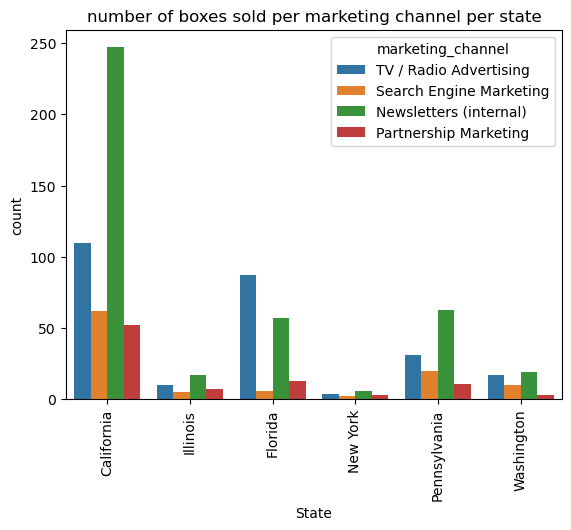

In [37]:
import seaborn as sns 
sns.countplot(x='State',hue='marketing_channel', data=df); 
plt.xticks(rotation='vertical');
plt.title('number of boxes sold per marketing channel per state');

## General conclusion

In [ ]:
# We conclude that 
# California, Florida, and Pennsyvannia States are Buying the most Lunch box. 
# The Adverstinsing the most usefull is seen via Newsletters(internal) and TV / radio media. 
# people buy lunch box mostly on Tuesday and Wednesday. 